In [1]:
# 1.0 Call libraries
# 1.1 Data manipulation libraries
import numpy as np
import pandas as pd

# 1.2 sklearn libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# 1.3 For plotting NN model
#  conda install -c anaconda graphviz
#  conda install -c anaconda pydot
from skimage import io
import pydot

# 1.4 Keras model components
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, concatenate, GRU, Embedding, Flatten
from tensorflow.keras.layers import Conv1D, Reshape
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

# 1.4.1 For text (word) to integer transformation
from tensorflow.keras.preprocessing.text import Tokenizer

# 1.4.2 For making all integer sequences of equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1.4.3 Import backend to invoke tensorflow commands to manipulate tensors
from tensorflow.keras import backend as K

# 1.5 Plotting libraries
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline 

# 1.6 Misc
import math, time, os,gc

In [2]:
# 1.7 Check tensorflow version:

tf.__version__    # 2.9.2

'2.9.1'

In [3]:
# 1.8 Print all outputs from a cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
import os

In [9]:
os.chdir("E:\\FORE\\Term 5\\FA\\toxicity-2")

In [10]:
#Read data
data = pd.read_csv("data.csv")

In [11]:
data.head()

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,0.0908,0,0.0075,0.0173,0,0.0,-0.0436,0.0409,0.0,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,NonToxic
1,0.0213,0,0.1144,-0.0410,0,0.0,0.1231,-0.0316,0.0,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,NonToxic
2,0.0018,0,-0.0156,-0.0765,2,0.0,-0.1138,-0.1791,0.0,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,NonToxic
3,-0.0251,0,-0.0064,-0.0894,3,0.0,-0.0747,-0.1151,0.0,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,NonToxic
4,0.0135,0,0.0424,-0.0353,0,0.0,-0.0638,0.0307,0.0,0.0306,...,12.3240,19.7486,0.1789,1.4495,0.0120,2,0.0,-0.1071,0.00,NonToxic


In [12]:
data.isnull().sum()

MATS3v             0
nHBint10           0
MATS3s             0
MATS3p             0
nHBDon_Lipinski    0
                  ..
nT5Ring            0
SHdNH              0
ETA_dEpsilon_C     0
MDEO-22            0
Class              0
Length: 1204, dtype: int64

In [13]:
data['target'] = data['Class']

In [14]:
data = data.drop(['Class'],axis= 1)

In [15]:
le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])

In [16]:
X = data.drop(['target'], axis = 1)
y = data['target']

In [17]:
X = np.asarray(X).astype('float32')

In [18]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=10, 
                                   test_size=0.3, 
                                   shuffle=True)

In [19]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(119, 1203)

(52, 1203)

(119,)

(52,)

In [20]:
model = Sequential()
model.add(LSTM(128, activation='relu',input_shape=(1203, 1), return_sequences=True))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
start = time.time()
history= model.fit(X_train,
                   y_train,
                   epochs=5,
                   batch_size=30000,
                   validation_data=(X_test, y_test),
                   #callbacks = callbacks,
                   verbose=1
                  )

end = time.time()
print((end-start)/60)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: nan - accuracy: 0.7143 - val_loss: nan - val_accuracy: 0.5769
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: nan - accuracy: 0.7143 - val_loss: nan - val_accuracy: 0.5769
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: nan - accuracy: 0.7143 - val_loss: nan - val_accuracy: 0.5769
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: nan - accuracy: 0.7143 - val_loss: nan - val_accuracy: 0.5769
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: nan - accuracy: 0.7143 - val_loss: nan - val_accuracy: 0.5769
0.22853615283966064


In [22]:
t = pd.read_csv("data.csv")

In [23]:
t.head()

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,0.0908,0,0.0075,0.0173,0,0.0,-0.0436,0.0409,0.0,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,NonToxic
1,0.0213,0,0.1144,-0.0410,0,0.0,0.1231,-0.0316,0.0,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,NonToxic
2,0.0018,0,-0.0156,-0.0765,2,0.0,-0.1138,-0.1791,0.0,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,NonToxic
3,-0.0251,0,-0.0064,-0.0894,3,0.0,-0.0747,-0.1151,0.0,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,NonToxic
4,0.0135,0,0.0424,-0.0353,0,0.0,-0.0638,0.0307,0.0,0.0306,...,12.3240,19.7486,0.1789,1.4495,0.0120,2,0.0,-0.1071,0.00,NonToxic


In [26]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [27]:
t.shape

(171, 1204)

In [ ]:
t[:, 0:15].info()

In [29]:
t.describe()

MATS3v    nHBint10      MATS3s      MATS3p  nHBDon_Lipinski  \
count  171.000000  171.000000  171.000000  171.000000       171.000000   
mean    -0.031244    0.315789   -0.001001   -0.061501         0.994152   
std      0.063559    0.762918    0.063928    0.072891         1.108773   
min     -0.311500    0.000000   -0.184600   -0.348500         0.000000   
25%     -0.066700    0.000000   -0.036000   -0.099550         0.000000   
50%     -0.032500    0.000000   -0.002000   -0.059400         1.000000   
75%      0.004850    0.000000    0.029000   -0.017100         2.000000   
max      0.141100    4.000000    0.218100    0.129000         6.000000   

        minHBint8      MATS3e      MATS3c   minHBint2      MATS3m   minHBint6  \
count  171.000000  171.000000  171.000000  171.000000  171.000000  171.000000   
mean     0.677770   -0.025418   -0.053289    1.569251    0.003226    0.520492   
std      1.647322    0.078645    0.109463    2.497362    0.074076    1.257976   
min      0.000000   -0.211900   -0.472900   -0.708700   -0.198700    0.000000   
25%      0.000000   -0.066550   -0.118050    0.000000   -0.052350    0.000000   
50%      0.000000   -0.037200   -0.042400    0.000000   -0.001600    0.000000   
75%      0.000000    0.002650    0.014300    4.897450    0.056550    0.522700   
max      8.141400    0.249500    0.212200    7.740800    0.168400    6.462100   

        minHBint7   minHBint4      MATS3i      VR3_Dt  SpMax8_Bhi        SdsN  \
count  171.000000  171.000000  171.000000  171.000000  171.000000  171.000000   
mean     0.723782    0.718278   -0.081831   28.644151    3.123065    1.706996   
std      1.827843    1.668787    0.091539   12.582709    0.198351    3.159232   
min     -0.913900   -1.038800   -0.351000    7.728200    1.916300    0.000000   
25%      0.000000    0.000000   -0.139200   22.655700    3.072500    0.000000   
50%      0.000000    0.000000   -0.076600   25.064400    3.143200    0.000000   
75%      0.095100    0.346850   -0.022200   28.653600    3.243750    4.296700   
max      8.822100    7.266200    0.178000   72.067800    3.359700   13.254800   

       SpMax8_Bhm  SpMax8_Bhe        ECCEN     MDEC-14  SpMax8_Bhs  \
count  171.000000  171.000000   171.000000  171.000000  171.000000   
mean     3.019816    3.082035  1158.654971    0.080663    3.386848   
std      0.224161    0.208259   270.833818    0.488018    0.313643   
min      1.608500    1.810200   199.000000    0.000000    2.235600   
25%      2.956200    3.020850  1041.000000    0.000000    3.220500   
50%      3.055600    3.110500  1193.000000    0.000000    3.393000   
75%      3.141500    3.198150  1321.500000    0.000000    3.623550   
max      3.266400    3.315800  1783.000000    5.366600    4.110600   

       SpMax8_Bhp  SpMax8_Bhv     MDEC-11     MDEC-12     MDEC-13  \
count  171.000000  171.000000  171.000000  171.000000  171.000000   
mean     2.910943    2.918874    0.100580    1.786255    1.998240   
std      0.234701    0.231491    0.354821    2.024710    2.592965   
min      1.323900    1.367600    0.000000    0.000000    0.000000   
25%      2.871200    2.873050    0.000000    0.000000    0.000000   
50%      2.937000    2.952800    0.000000    1.419600    1.313000   
75%      3.023850    3.030850    0.055600    2.944650    3.296400   
max      3.204400    3.212800    3.879600    7.241800   11.559200   

              VR2_Dt        BIC5        ATS7s       ATS7p         ATS7v  \
count     171.000000  171.000000   171.000000  171.000000    171.000000   
mean    12530.867470    0.853699   508.944899  221.364883  30651.982409   
std     43928.291795    0.051786   151.703273   63.964287   8605.417659   
min         5.593700    0.629100    61.333300   12.368000   2114.785200   
25%        11.178450    0.831250   411.956800  178.753950  24991.261050   
50%        14.761000    0.865500   516.555600  224.739300  31124.712500   
75%        26.162600    0.894400   608.875000  269.530000  36992.333350   
max    441865.375300    0.92010

In [30]:
t.head()

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,minHBint6,minHBint7,minHBint4,MATS3i,VR3_Dt,SpMax8_Bhi,SdsN,SpMax8_Bhm,SpMax8_Bhe,ECCEN,MDEC-14,SpMax8_Bhs,SpMax8_Bhp,SpMax8_Bhv,MDEC-11,MDEC-12,MDEC-13,VR2_Dt,BIC5,ATS7s,ATS7p,ATS7v,ATS7i,ATS7m,ATS7e,mintN,nHsNH2,khs.sssCH,minHBint3,maxdssC,nT6Ring,minHBint5,nF8Ring,minssCH2,SpMax_DzZ,ETA_EtaP,nHsOH,SpMin1_Bhe,maxHother,nHBAcc_Lipinski,StN,khs.aaS,khs.aaO,khs.aaN,Sare,SHAvin,SpMax3_Bhv,SpMax3_Bhp,SpMax3_Bhs,SpMax3_Bhe,SpMin6_Bhi,SpMax3_Bhm,SpMax3_Bhi,ETA_EtaP_F_L,mindCH2,AATSC2e,AATSC2c,AATSC2m,AATSC2i,nsBr,AATS5p,AATSC2v,AATSC2p,AATSC2s,VABC,maxdNH,khs.ddsN,RotBtFrac,ATS4e,ATS4m,nFRing,ATS4i,EE_DzZ,ATS4s,ATS4p,ETA_Alpha,khs.sssN,EE_Dzi,MAXDN,EE_Dzm,EE_Dze,EE_Dzs,EE_Dzp,EE_Dzv,ATS8e,maxsOH,minssssNp,maxsOm,MDEC-23,MDEC-22,MDEC-24,nFG12HeteroRing,ATS8s,ATS8v,SP-6,SP-7,SHsNH2,SP-5,SP-2,SP-3,SP-0,SP-1,minHsOH,ATSC8v,MATS2v,ATSC8s,MATS2p,MATS2s,ATSC8p,MATS2e,ATSC8e,ATSC8c,MATS2c,MATS2m,topoDiameter,ATSC8m,MATS2i,ATSC8i,ntN,khs.ssCH2,SpAD_Dt,ETA_Eta_R_L,SHdsCH,SaasN,SC-4,SaasC,minaaCH,AATSC3c,AATSC3e,AATSC3i,AATSC3m,AATSC3s,AATSC3p,AATSC3v,SpMax2_Bhp,nF8HeteroRing,AATS8e,AATS8i,AATS8m,AATS8s,AATS8p,AATS8v,VE3_Dt,XLogP,SpMax2_Bhi,maxssCH2,minaaS,SpMax4_Bhv,SpMax4_Bhs,SpMax4_Bhp,SpMax4_Bhm,minHaaNH,SpMax4_Bhi,minaaN,SpMax4_Bhe,StsC,SssCH2,maxHdNH,MATS1p,R_TpiPCTPC,MATS1s,MATS1v,JGI10,MATS1c,MATS1e,VR2_DzZ,MATS1i,MATS1m,MDEC-34,MDEC-33,VR2_Dze,VR2_Dzm,VR2_Dzs,VR2_Dzp,khs.ssssC,nTG12Ring,khs.ssssN,ATS5e,gmin,VR2_D,ATS5m,ATS5p,ATS5s,ATS5v,AATSC5p,TpiPC,maxsCH3,SdS,khs.ssO,ETA_Eta_F_L,khs.ssS,SdO,VE2_Dt,maxHtCH,SpMax_Dze,SpMax_Dzm,SpMax_Dzi,ETA_dEpsilon_B,SpMax_Dzv,ETA_dEpsilon_A,SpMax_Dzs,ETA_dEpsilon_D,SpMax_Dzp,SsNH2,StCH,SsCH3,CIC5,CIC4,CIC1,CIC0,CIC3,CIC2,nF10HeteroRing,maxssO,WPOL,n5HeteroRing,maxHAvin,fragC,ETA_Eta_B_RC,AATS7m,SpDiam_Dt,SdssC,ETA_Epsilon_3,AATS7i,AATS7e,nT9Ring,minsCl,AATS7v,AATS7s,AATS7p,nHdCH2,ETA_Epsilon_5,ETA_Epsilon_4,SsssCH,maxHsOH,GATS1v,maxaaaC,GATS1s,minsNH2,BIC4,SpMin7_Bhs,SpMin7_Bhp,SpMin7_Bhv,nHtCH,GATS1e,mintsC,GATS1c,SpMin7_Bhm,GATS1m,SpMin7_Bhe,GATS1i,maxtsC,minHAvin,MDEC-44,AATS2v,SPC-6,SPC-4,SPC-5,SpAD_D,MATS6c,ETA_BetaP_s,minaasC,minaasN,minssNH,nT7HeteroRing,RotBFrac,nF10Ring,ETA_BetaP_ns,nH,nL,nN,nO,nA,nC,nF,nX,nQ,nS,nV,ATS1m,SdNH,mindsN,SHCsats,SHCsatu,CrippenMR,GATS1p,SRW10,ETA_dPsi_A,AATS6m,AATS6i,AATS6e,minsBr,nF9HeteroRing,SpMin7_Bhi,AATS6v,AATS6p,AATS6s,naAromAtom,nBase,minHBint10,SpDiam_DzZ,SaaNH,nssssC,khs.dNH,maxaaN,maxaaO,SpDiam_Dzv,SpDiam_Dzs,SpDiam_Dzp,SpDiam_Dze,SpDiam_Dzm,GATS6i,SpDiam_Dzi,Mi,Mv,Mp,GGI10,nBr,bpol,MW,GATS6v,MATS7s,MATS7p,C1SP1,MATS7v,MATS7i,MATS7m,MATS7c,GATS6s,MATS7e,maxtN,SpMin8_Bhe,SpMin8_Bhi,SpMin8_Bhm,SpMin8_Bhp,SpMin8_Bhs,SpMin8_Bhv,maxHCsatu,maxHCsats,ATSC3v,ATSC3s,ATSC3p,minHdCH2,ATSC3e,ATSC3c,maxssNH,ATSC3m,ATSC3i,minHCsatu,minHCsats,SpMax7_Bhe,SpMax7_Bhi,SpMax7_Bhm,ETA_BetaP_ns_d,SpMax7_Bhp,SpMax7_Bhs,SpMax7_Bhv,SdsCH,minssO,minssS,SpMin3_Bhe,SpMin3_Bhm,SpMin3_Bhi,SpMin3_Bhv,nT8Ring,SpMin3_Bhs,SpMin3_Bhp,TPC,khs.tCH,VP-5,VP-4,VP-7,VP-6,VP-1,VP-0,VP-3,VP-2,MIC5,MIC4,MIC3,MIC2,MIC1,MIC0,ATSC5p,piPC10,ATSC5s,minsOm,nT10HeteroRing,nHBa,nHBd,SddssS,nCl,minsOH,SHaaCH,nHBDon,nF11HeteroRing,AATS5i,AATS5m,SpMin6_Bhs,SpMin6_Bhp,SpMin6_Bhv,AATS5e,ETA_dBeta,khs.sCH3,ALogP,SpMin6_Bhm,BCUTp-1l,AATS5s,BCUTp-1h,AATS5v,SpMin6_Bhe,ATS8i,ATS8m,BCUTw-1h,BCUTw-1l,nBondsS3,nBondsS2,ATS8p,GATS3p,GATS3s,GATS3v,GATS3c,GATS3e,SC-5,GATS3i,SC-6,GATS3m,SC-3,minsCH3,SssssC,nAtomLC,nT12HeteroRing,minHaaCH,MLFER_BH,MLFER_BO,SaaaC,mindsCH,nddssS,maxaasC,maxsssN,MATS6p,MATS6s,MATS6v,MATS6i,MATS6m,MATS6e,ETA_Beta_ns_d,hmax,ETA_Beta_s,nHaaCH,khs.aaaC,khs.sNH2,ETA_AlphaP,nAromBond,ATSC2v,ATSC2p,ATSC2s,ATS4v,ATSC2e,ATSC2c,ATSC2m,ATSC2i,AATS4v,AATS4s,AATS4p,AATS4e,ETA_BetaP,AATS4m,khs.sOH,AATS4i,SHsOH,SpMax_D,MDEN-13,MDEN-12,MDEN-11,ntsC,ATS3m,PetitjeanNumber,khs.aasN,khs.aasC,MWC10,MPC7,TWC,topoRadius,WPATH,nG,ndsN,MAXDP,naaaC,SM1_DzZ,SpAbs_DzZ,SpAbs_Dze,khs.aaNH,SpAbs_Dzm,SM1_Dzv,SpAbs_Dzi,SM1_Dzp,SM1_Dz

In [31]:
t.isna().sum()

MATS3v               0
nHBint10             0
MATS3s               0
MATS3p               0
nHBDon_Lipinski      0
minHBint8            0
MATS3e               0
MATS3c               0
minHBint2            0
MATS3m               0
minHBint6            0
minHBint7            0
minHBint4            0
MATS3i               0
VR3_Dt               0
SpMax8_Bhi           0
SdsN                 0
SpMax8_Bhm           0
SpMax8_Bhe           0
ECCEN                0
MDEC-14              0
SpMax8_Bhs           0
SpMax8_Bhp           0
SpMax8_Bhv           0
MDEC-11              0
MDEC-12              0
MDEC-13              0
VR2_Dt               0
BIC5                 0
ATS7s                0
ATS7p                0
ATS7v                0
ATS7i                0
ATS7m                0
ATS7e                0
mintN                0
nHsNH2               0
khs.sssCH            0
minHBint3            0
maxdssC              0
nT6Ring              0
minHBint5            0
nF8Ring              0
minssCH2   

In [33]:
import seaborn as sns

<AxesSubplot:>

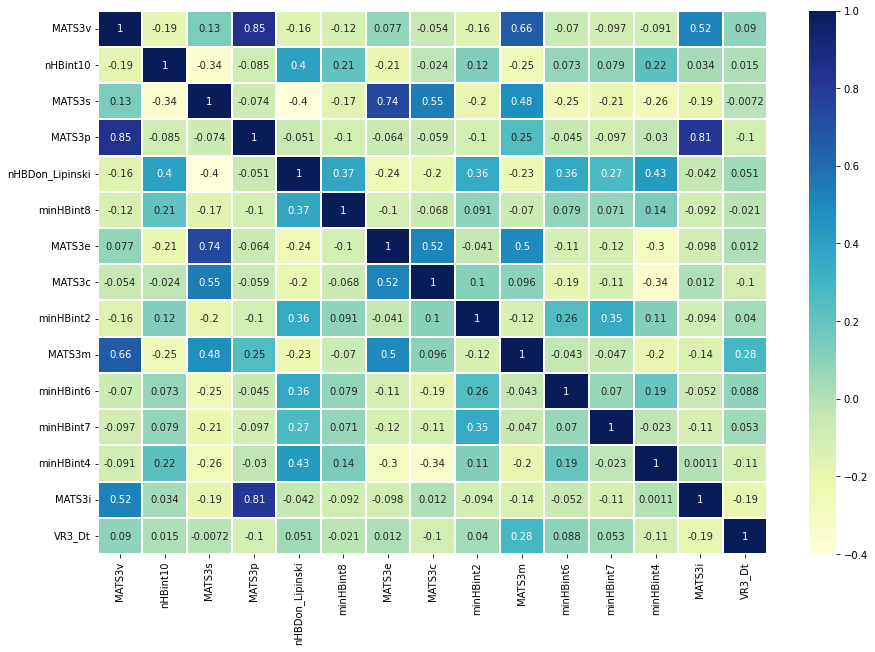

In [66]:
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(t.iloc[:, 0:15].corr(), annot=True, linewidths=.05, cmap="YlGnBu",ax=ax)
plt.show()   

In [67]:
t.head()

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,minHBint6,minHBint7,minHBint4,MATS3i,VR3_Dt,SpMax8_Bhi,SdsN,SpMax8_Bhm,SpMax8_Bhe,ECCEN,MDEC-14,SpMax8_Bhs,SpMax8_Bhp,SpMax8_Bhv,MDEC-11,MDEC-12,MDEC-13,VR2_Dt,BIC5,ATS7s,ATS7p,ATS7v,ATS7i,ATS7m,ATS7e,mintN,nHsNH2,khs.sssCH,minHBint3,maxdssC,nT6Ring,minHBint5,nF8Ring,minssCH2,SpMax_DzZ,ETA_EtaP,nHsOH,SpMin1_Bhe,maxHother,nHBAcc_Lipinski,StN,khs.aaS,khs.aaO,khs.aaN,Sare,SHAvin,SpMax3_Bhv,SpMax3_Bhp,SpMax3_Bhs,SpMax3_Bhe,SpMin6_Bhi,SpMax3_Bhm,SpMax3_Bhi,ETA_EtaP_F_L,mindCH2,AATSC2e,AATSC2c,AATSC2m,AATSC2i,nsBr,AATS5p,AATSC2v,AATSC2p,AATSC2s,VABC,maxdNH,khs.ddsN,RotBtFrac,ATS4e,ATS4m,nFRing,ATS4i,EE_DzZ,ATS4s,ATS4p,ETA_Alpha,khs.sssN,EE_Dzi,MAXDN,EE_Dzm,EE_Dze,EE_Dzs,EE_Dzp,EE_Dzv,ATS8e,maxsOH,minssssNp,maxsOm,MDEC-23,MDEC-22,MDEC-24,nFG12HeteroRing,ATS8s,ATS8v,SP-6,SP-7,SHsNH2,SP-5,SP-2,SP-3,SP-0,SP-1,minHsOH,ATSC8v,MATS2v,ATSC8s,MATS2p,MATS2s,ATSC8p,MATS2e,ATSC8e,ATSC8c,MATS2c,MATS2m,topoDiameter,ATSC8m,MATS2i,ATSC8i,ntN,khs.ssCH2,SpAD_Dt,ETA_Eta_R_L,SHdsCH,SaasN,SC-4,SaasC,minaaCH,AATSC3c,AATSC3e,AATSC3i,AATSC3m,AATSC3s,AATSC3p,AATSC3v,SpMax2_Bhp,nF8HeteroRing,AATS8e,AATS8i,AATS8m,AATS8s,AATS8p,AATS8v,VE3_Dt,XLogP,SpMax2_Bhi,maxssCH2,minaaS,SpMax4_Bhv,SpMax4_Bhs,SpMax4_Bhp,SpMax4_Bhm,minHaaNH,SpMax4_Bhi,minaaN,SpMax4_Bhe,StsC,SssCH2,maxHdNH,MATS1p,R_TpiPCTPC,MATS1s,MATS1v,JGI10,MATS1c,MATS1e,VR2_DzZ,MATS1i,MATS1m,MDEC-34,MDEC-33,VR2_Dze,VR2_Dzm,VR2_Dzs,VR2_Dzp,khs.ssssC,nTG12Ring,khs.ssssN,ATS5e,gmin,VR2_D,ATS5m,ATS5p,ATS5s,ATS5v,AATSC5p,TpiPC,maxsCH3,SdS,khs.ssO,ETA_Eta_F_L,khs.ssS,SdO,VE2_Dt,maxHtCH,SpMax_Dze,SpMax_Dzm,SpMax_Dzi,ETA_dEpsilon_B,SpMax_Dzv,ETA_dEpsilon_A,SpMax_Dzs,ETA_dEpsilon_D,SpMax_Dzp,SsNH2,StCH,SsCH3,CIC5,CIC4,CIC1,CIC0,CIC3,CIC2,nF10HeteroRing,maxssO,WPOL,n5HeteroRing,maxHAvin,fragC,ETA_Eta_B_RC,AATS7m,SpDiam_Dt,SdssC,ETA_Epsilon_3,AATS7i,AATS7e,nT9Ring,minsCl,AATS7v,AATS7s,AATS7p,nHdCH2,ETA_Epsilon_5,ETA_Epsilon_4,SsssCH,maxHsOH,GATS1v,maxaaaC,GATS1s,minsNH2,BIC4,SpMin7_Bhs,SpMin7_Bhp,SpMin7_Bhv,nHtCH,GATS1e,mintsC,GATS1c,SpMin7_Bhm,GATS1m,SpMin7_Bhe,GATS1i,maxtsC,minHAvin,MDEC-44,AATS2v,SPC-6,SPC-4,SPC-5,SpAD_D,MATS6c,ETA_BetaP_s,minaasC,minaasN,minssNH,nT7HeteroRing,RotBFrac,nF10Ring,ETA_BetaP_ns,nH,nL,nN,nO,nA,nC,nF,nX,nQ,nS,nV,ATS1m,SdNH,mindsN,SHCsats,SHCsatu,CrippenMR,GATS1p,SRW10,ETA_dPsi_A,AATS6m,AATS6i,AATS6e,minsBr,nF9HeteroRing,SpMin7_Bhi,AATS6v,AATS6p,AATS6s,naAromAtom,nBase,minHBint10,SpDiam_DzZ,SaaNH,nssssC,khs.dNH,maxaaN,maxaaO,SpDiam_Dzv,SpDiam_Dzs,SpDiam_Dzp,SpDiam_Dze,SpDiam_Dzm,GATS6i,SpDiam_Dzi,Mi,Mv,Mp,GGI10,nBr,bpol,MW,GATS6v,MATS7s,MATS7p,C1SP1,MATS7v,MATS7i,MATS7m,MATS7c,GATS6s,MATS7e,maxtN,SpMin8_Bhe,SpMin8_Bhi,SpMin8_Bhm,SpMin8_Bhp,SpMin8_Bhs,SpMin8_Bhv,maxHCsatu,maxHCsats,ATSC3v,ATSC3s,ATSC3p,minHdCH2,ATSC3e,ATSC3c,maxssNH,ATSC3m,ATSC3i,minHCsatu,minHCsats,SpMax7_Bhe,SpMax7_Bhi,SpMax7_Bhm,ETA_BetaP_ns_d,SpMax7_Bhp,SpMax7_Bhs,SpMax7_Bhv,SdsCH,minssO,minssS,SpMin3_Bhe,SpMin3_Bhm,SpMin3_Bhi,SpMin3_Bhv,nT8Ring,SpMin3_Bhs,SpMin3_Bhp,TPC,khs.tCH,VP-5,VP-4,VP-7,VP-6,VP-1,VP-0,VP-3,VP-2,MIC5,MIC4,MIC3,MIC2,MIC1,MIC0,ATSC5p,piPC10,ATSC5s,minsOm,nT10HeteroRing,nHBa,nHBd,SddssS,nCl,minsOH,SHaaCH,nHBDon,nF11HeteroRing,AATS5i,AATS5m,SpMin6_Bhs,SpMin6_Bhp,SpMin6_Bhv,AATS5e,ETA_dBeta,khs.sCH3,ALogP,SpMin6_Bhm,BCUTp-1l,AATS5s,BCUTp-1h,AATS5v,SpMin6_Bhe,ATS8i,ATS8m,BCUTw-1h,BCUTw-1l,nBondsS3,nBondsS2,ATS8p,GATS3p,GATS3s,GATS3v,GATS3c,GATS3e,SC-5,GATS3i,SC-6,GATS3m,SC-3,minsCH3,SssssC,nAtomLC,nT12HeteroRing,minHaaCH,MLFER_BH,MLFER_BO,SaaaC,mindsCH,nddssS,maxaasC,maxsssN,MATS6p,MATS6s,MATS6v,MATS6i,MATS6m,MATS6e,ETA_Beta_ns_d,hmax,ETA_Beta_s,nHaaCH,khs.aaaC,khs.sNH2,ETA_AlphaP,nAromBond,ATSC2v,ATSC2p,ATSC2s,ATS4v,ATSC2e,ATSC2c,ATSC2m,ATSC2i,AATS4v,AATS4s,AATS4p,AATS4e,ETA_BetaP,AATS4m,khs.sOH,AATS4i,SHsOH,SpMax_D,MDEN-13,MDEN-12,MDEN-11,ntsC,ATS3m,PetitjeanNumber,khs.aasN,khs.aasC,MWC10,MPC7,TWC,topoRadius,WPATH,nG,ndsN,MAXDP,naaaC,SM1_DzZ,SpAbs_DzZ,SpAbs_Dze,khs.aaNH,SpAbs_Dzm,SM1_Dzv,SpAbs_Dzi,SM1_Dzp,SM1_Dz

In [69]:
X = t.drop(['Class'], axis = 1)
y = t['Class']

In [70]:
X.head()

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,minHBint6,minHBint7,minHBint4,MATS3i,VR3_Dt,SpMax8_Bhi,SdsN,SpMax8_Bhm,SpMax8_Bhe,ECCEN,MDEC-14,SpMax8_Bhs,SpMax8_Bhp,SpMax8_Bhv,MDEC-11,MDEC-12,MDEC-13,VR2_Dt,BIC5,ATS7s,ATS7p,ATS7v,ATS7i,ATS7m,ATS7e,mintN,nHsNH2,khs.sssCH,minHBint3,maxdssC,nT6Ring,minHBint5,nF8Ring,minssCH2,SpMax_DzZ,ETA_EtaP,nHsOH,SpMin1_Bhe,maxHother,nHBAcc_Lipinski,StN,khs.aaS,khs.aaO,khs.aaN,Sare,SHAvin,SpMax3_Bhv,SpMax3_Bhp,SpMax3_Bhs,SpMax3_Bhe,SpMin6_Bhi,SpMax3_Bhm,SpMax3_Bhi,ETA_EtaP_F_L,mindCH2,AATSC2e,AATSC2c,AATSC2m,AATSC2i,nsBr,AATS5p,AATSC2v,AATSC2p,AATSC2s,VABC,maxdNH,khs.ddsN,RotBtFrac,ATS4e,ATS4m,nFRing,ATS4i,EE_DzZ,ATS4s,ATS4p,ETA_Alpha,khs.sssN,EE_Dzi,MAXDN,EE_Dzm,EE_Dze,EE_Dzs,EE_Dzp,EE_Dzv,ATS8e,maxsOH,minssssNp,maxsOm,MDEC-23,MDEC-22,MDEC-24,nFG12HeteroRing,ATS8s,ATS8v,SP-6,SP-7,SHsNH2,SP-5,SP-2,SP-3,SP-0,SP-1,minHsOH,ATSC8v,MATS2v,ATSC8s,MATS2p,MATS2s,ATSC8p,MATS2e,ATSC8e,ATSC8c,MATS2c,MATS2m,topoDiameter,ATSC8m,MATS2i,ATSC8i,ntN,khs.ssCH2,SpAD_Dt,ETA_Eta_R_L,SHdsCH,SaasN,SC-4,SaasC,minaaCH,AATSC3c,AATSC3e,AATSC3i,AATSC3m,AATSC3s,AATSC3p,AATSC3v,SpMax2_Bhp,nF8HeteroRing,AATS8e,AATS8i,AATS8m,AATS8s,AATS8p,AATS8v,VE3_Dt,XLogP,SpMax2_Bhi,maxssCH2,minaaS,SpMax4_Bhv,SpMax4_Bhs,SpMax4_Bhp,SpMax4_Bhm,minHaaNH,SpMax4_Bhi,minaaN,SpMax4_Bhe,StsC,SssCH2,maxHdNH,MATS1p,R_TpiPCTPC,MATS1s,MATS1v,JGI10,MATS1c,MATS1e,VR2_DzZ,MATS1i,MATS1m,MDEC-34,MDEC-33,VR2_Dze,VR2_Dzm,VR2_Dzs,VR2_Dzp,khs.ssssC,nTG12Ring,khs.ssssN,ATS5e,gmin,VR2_D,ATS5m,ATS5p,ATS5s,ATS5v,AATSC5p,TpiPC,maxsCH3,SdS,khs.ssO,ETA_Eta_F_L,khs.ssS,SdO,VE2_Dt,maxHtCH,SpMax_Dze,SpMax_Dzm,SpMax_Dzi,ETA_dEpsilon_B,SpMax_Dzv,ETA_dEpsilon_A,SpMax_Dzs,ETA_dEpsilon_D,SpMax_Dzp,SsNH2,StCH,SsCH3,CIC5,CIC4,CIC1,CIC0,CIC3,CIC2,nF10HeteroRing,maxssO,WPOL,n5HeteroRing,maxHAvin,fragC,ETA_Eta_B_RC,AATS7m,SpDiam_Dt,SdssC,ETA_Epsilon_3,AATS7i,AATS7e,nT9Ring,minsCl,AATS7v,AATS7s,AATS7p,nHdCH2,ETA_Epsilon_5,ETA_Epsilon_4,SsssCH,maxHsOH,GATS1v,maxaaaC,GATS1s,minsNH2,BIC4,SpMin7_Bhs,SpMin7_Bhp,SpMin7_Bhv,nHtCH,GATS1e,mintsC,GATS1c,SpMin7_Bhm,GATS1m,SpMin7_Bhe,GATS1i,maxtsC,minHAvin,MDEC-44,AATS2v,SPC-6,SPC-4,SPC-5,SpAD_D,MATS6c,ETA_BetaP_s,minaasC,minaasN,minssNH,nT7HeteroRing,RotBFrac,nF10Ring,ETA_BetaP_ns,nH,nL,nN,nO,nA,nC,nF,nX,nQ,nS,nV,ATS1m,SdNH,mindsN,SHCsats,SHCsatu,CrippenMR,GATS1p,SRW10,ETA_dPsi_A,AATS6m,AATS6i,AATS6e,minsBr,nF9HeteroRing,SpMin7_Bhi,AATS6v,AATS6p,AATS6s,naAromAtom,nBase,minHBint10,SpDiam_DzZ,SaaNH,nssssC,khs.dNH,maxaaN,maxaaO,SpDiam_Dzv,SpDiam_Dzs,SpDiam_Dzp,SpDiam_Dze,SpDiam_Dzm,GATS6i,SpDiam_Dzi,Mi,Mv,Mp,GGI10,nBr,bpol,MW,GATS6v,MATS7s,MATS7p,C1SP1,MATS7v,MATS7i,MATS7m,MATS7c,GATS6s,MATS7e,maxtN,SpMin8_Bhe,SpMin8_Bhi,SpMin8_Bhm,SpMin8_Bhp,SpMin8_Bhs,SpMin8_Bhv,maxHCsatu,maxHCsats,ATSC3v,ATSC3s,ATSC3p,minHdCH2,ATSC3e,ATSC3c,maxssNH,ATSC3m,ATSC3i,minHCsatu,minHCsats,SpMax7_Bhe,SpMax7_Bhi,SpMax7_Bhm,ETA_BetaP_ns_d,SpMax7_Bhp,SpMax7_Bhs,SpMax7_Bhv,SdsCH,minssO,minssS,SpMin3_Bhe,SpMin3_Bhm,SpMin3_Bhi,SpMin3_Bhv,nT8Ring,SpMin3_Bhs,SpMin3_Bhp,TPC,khs.tCH,VP-5,VP-4,VP-7,VP-6,VP-1,VP-0,VP-3,VP-2,MIC5,MIC4,MIC3,MIC2,MIC1,MIC0,ATSC5p,piPC10,ATSC5s,minsOm,nT10HeteroRing,nHBa,nHBd,SddssS,nCl,minsOH,SHaaCH,nHBDon,nF11HeteroRing,AATS5i,AATS5m,SpMin6_Bhs,SpMin6_Bhp,SpMin6_Bhv,AATS5e,ETA_dBeta,khs.sCH3,ALogP,SpMin6_Bhm,BCUTp-1l,AATS5s,BCUTp-1h,AATS5v,SpMin6_Bhe,ATS8i,ATS8m,BCUTw-1h,BCUTw-1l,nBondsS3,nBondsS2,ATS8p,GATS3p,GATS3s,GATS3v,GATS3c,GATS3e,SC-5,GATS3i,SC-6,GATS3m,SC-3,minsCH3,SssssC,nAtomLC,nT12HeteroRing,minHaaCH,MLFER_BH,MLFER_BO,SaaaC,mindsCH,nddssS,maxaasC,maxsssN,MATS6p,MATS6s,MATS6v,MATS6i,MATS6m,MATS6e,ETA_Beta_ns_d,hmax,ETA_Beta_s,nHaaCH,khs.aaaC,khs.sNH2,ETA_AlphaP,nAromBond,ATSC2v,ATSC2p,ATSC2s,ATS4v,ATSC2e,ATSC2c,ATSC2m,ATSC2i,AATS4v,AATS4s,AATS4p,AATS4e,ETA_BetaP,AATS4m,khs.sOH,AATS4i,SHsOH,SpMax_D,MDEN-13,MDEN-12,MDEN-11,ntsC,ATS3m,PetitjeanNumber,khs.aasN,khs.aasC,MWC10,MPC7,TWC,topoRadius,WPATH,nG,ndsN,MAXDP,naaaC,SM1_DzZ,SpAbs_DzZ,SpAbs_Dze,khs.aaNH,SpAbs_Dzm,SM1_Dzv,SpAbs_Dzi,SM1_Dzp,SM1_Dz

In [71]:
y.head()

0    NonToxic
1    NonToxic
2    NonToxic
3    NonToxic
4    NonToxic
Name: Class, dtype: object

In [72]:
y = pd.DataFrame(y)

In [73]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# get numeric data
num_d = t.select_dtypes(exclude=['object'])

# update the cols with their normalized values
t[num_d.columns] = sc.fit_transform(num_d)



In [74]:
t.head()

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,minHBint6,minHBint7,minHBint4,MATS3i,VR3_Dt,SpMax8_Bhi,SdsN,SpMax8_Bhm,SpMax8_Bhe,ECCEN,MDEC-14,SpMax8_Bhs,SpMax8_Bhp,SpMax8_Bhv,MDEC-11,MDEC-12,MDEC-13,VR2_Dt,BIC5,ATS7s,ATS7p,ATS7v,ATS7i,ATS7m,ATS7e,mintN,nHsNH2,khs.sssCH,minHBint3,maxdssC,nT6Ring,minHBint5,nF8Ring,minssCH2,SpMax_DzZ,ETA_EtaP,nHsOH,SpMin1_Bhe,maxHother,nHBAcc_Lipinski,StN,khs.aaS,khs.aaO,khs.aaN,Sare,SHAvin,SpMax3_Bhv,SpMax3_Bhp,SpMax3_Bhs,SpMax3_Bhe,SpMin6_Bhi,SpMax3_Bhm,SpMax3_Bhi,ETA_EtaP_F_L,mindCH2,AATSC2e,AATSC2c,AATSC2m,AATSC2i,nsBr,AATS5p,AATSC2v,AATSC2p,AATSC2s,VABC,maxdNH,khs.ddsN,RotBtFrac,ATS4e,ATS4m,nFRing,ATS4i,EE_DzZ,ATS4s,ATS4p,ETA_Alpha,khs.sssN,EE_Dzi,MAXDN,EE_Dzm,EE_Dze,EE_Dzs,EE_Dzp,EE_Dzv,ATS8e,maxsOH,minssssNp,maxsOm,MDEC-23,MDEC-22,MDEC-24,nFG12HeteroRing,ATS8s,ATS8v,SP-6,SP-7,SHsNH2,SP-5,SP-2,SP-3,SP-0,SP-1,minHsOH,ATSC8v,MATS2v,ATSC8s,MATS2p,MATS2s,ATSC8p,MATS2e,ATSC8e,ATSC8c,MATS2c,MATS2m,topoDiameter,ATSC8m,MATS2i,ATSC8i,ntN,khs.ssCH2,SpAD_Dt,ETA_Eta_R_L,SHdsCH,SaasN,SC-4,SaasC,minaaCH,AATSC3c,AATSC3e,AATSC3i,AATSC3m,AATSC3s,AATSC3p,AATSC3v,SpMax2_Bhp,nF8HeteroRing,AATS8e,AATS8i,AATS8m,AATS8s,AATS8p,AATS8v,VE3_Dt,XLogP,SpMax2_Bhi,maxssCH2,minaaS,SpMax4_Bhv,SpMax4_Bhs,SpMax4_Bhp,SpMax4_Bhm,minHaaNH,SpMax4_Bhi,minaaN,SpMax4_Bhe,StsC,SssCH2,maxHdNH,MATS1p,R_TpiPCTPC,MATS1s,MATS1v,JGI10,MATS1c,MATS1e,VR2_DzZ,MATS1i,MATS1m,MDEC-34,MDEC-33,VR2_Dze,VR2_Dzm,VR2_Dzs,VR2_Dzp,khs.ssssC,nTG12Ring,khs.ssssN,ATS5e,gmin,VR2_D,ATS5m,ATS5p,ATS5s,ATS5v,AATSC5p,TpiPC,maxsCH3,SdS,khs.ssO,ETA_Eta_F_L,khs.ssS,SdO,VE2_Dt,maxHtCH,SpMax_Dze,SpMax_Dzm,SpMax_Dzi,ETA_dEpsilon_B,SpMax_Dzv,ETA_dEpsilon_A,SpMax_Dzs,ETA_dEpsilon_D,SpMax_Dzp,SsNH2,StCH,SsCH3,CIC5,CIC4,CIC1,CIC0,CIC3,CIC2,nF10HeteroRing,maxssO,WPOL,n5HeteroRing,maxHAvin,fragC,ETA_Eta_B_RC,AATS7m,SpDiam_Dt,SdssC,ETA_Epsilon_3,AATS7i,AATS7e,nT9Ring,minsCl,AATS7v,AATS7s,AATS7p,nHdCH2,ETA_Epsilon_5,ETA_Epsilon_4,SsssCH,maxHsOH,GATS1v,maxaaaC,GATS1s,minsNH2,BIC4,SpMin7_Bhs,SpMin7_Bhp,SpMin7_Bhv,nHtCH,GATS1e,mintsC,GATS1c,SpMin7_Bhm,GATS1m,SpMin7_Bhe,GATS1i,maxtsC,minHAvin,MDEC-44,AATS2v,SPC-6,SPC-4,SPC-5,SpAD_D,MATS6c,ETA_BetaP_s,minaasC,minaasN,minssNH,nT7HeteroRing,RotBFrac,nF10Ring,ETA_BetaP_ns,nH,nL,nN,nO,nA,nC,nF,nX,nQ,nS,nV,ATS1m,SdNH,mindsN,SHCsats,SHCsatu,CrippenMR,GATS1p,SRW10,ETA_dPsi_A,AATS6m,AATS6i,AATS6e,minsBr,nF9HeteroRing,SpMin7_Bhi,AATS6v,AATS6p,AATS6s,naAromAtom,nBase,minHBint10,SpDiam_DzZ,SaaNH,nssssC,khs.dNH,maxaaN,maxaaO,SpDiam_Dzv,SpDiam_Dzs,SpDiam_Dzp,SpDiam_Dze,SpDiam_Dzm,GATS6i,SpDiam_Dzi,Mi,Mv,Mp,GGI10,nBr,bpol,MW,GATS6v,MATS7s,MATS7p,C1SP1,MATS7v,MATS7i,MATS7m,MATS7c,GATS6s,MATS7e,maxtN,SpMin8_Bhe,SpMin8_Bhi,SpMin8_Bhm,SpMin8_Bhp,SpMin8_Bhs,SpMin8_Bhv,maxHCsatu,maxHCsats,ATSC3v,ATSC3s,ATSC3p,minHdCH2,ATSC3e,ATSC3c,maxssNH,ATSC3m,ATSC3i,minHCsatu,minHCsats,SpMax7_Bhe,SpMax7_Bhi,SpMax7_Bhm,ETA_BetaP_ns_d,SpMax7_Bhp,SpMax7_Bhs,SpMax7_Bhv,SdsCH,minssO,minssS,SpMin3_Bhe,SpMin3_Bhm,SpMin3_Bhi,SpMin3_Bhv,nT8Ring,SpMin3_Bhs,SpMin3_Bhp,TPC,khs.tCH,VP-5,VP-4,VP-7,VP-6,VP-1,VP-0,VP-3,VP-2,MIC5,MIC4,MIC3,MIC2,MIC1,MIC0,ATSC5p,piPC10,ATSC5s,minsOm,nT10HeteroRing,nHBa,nHBd,SddssS,nCl,minsOH,SHaaCH,nHBDon,nF11HeteroRing,AATS5i,AATS5m,SpMin6_Bhs,SpMin6_Bhp,SpMin6_Bhv,AATS5e,ETA_dBeta,khs.sCH3,ALogP,SpMin6_Bhm,BCUTp-1l,AATS5s,BCUTp-1h,AATS5v,SpMin6_Bhe,ATS8i,ATS8m,BCUTw-1h,BCUTw-1l,nBondsS3,nBondsS2,ATS8p,GATS3p,GATS3s,GATS3v,GATS3c,GATS3e,SC-5,GATS3i,SC-6,GATS3m,SC-3,minsCH3,SssssC,nAtomLC,nT12HeteroRing,minHaaCH,MLFER_BH,MLFER_BO,SaaaC,mindsCH,nddssS,maxaasC,maxsssN,MATS6p,MATS6s,MATS6v,MATS6i,MATS6m,MATS6e,ETA_Beta_ns_d,hmax,ETA_Beta_s,nHaaCH,khs.aaaC,khs.sNH2,ETA_AlphaP,nAromBond,ATSC2v,ATSC2p,ATSC2s,ATS4v,ATSC2e,ATSC2c,ATSC2m,ATSC2i,AATS4v,AATS4s,AATS4p,AATS4e,ETA_BetaP,AATS4m,khs.sOH,AATS4i,SHsOH,SpMax_D,MDEN-13,MDEN-12,MDEN-11,ntsC,ATS3m,PetitjeanNumber,khs.aasN,khs.aasC,MWC10,MPC7,TWC,topoRadius,WPATH,nG,ndsN,MAXDP,naaaC,SM1_DzZ,SpAbs_DzZ,SpAbs_Dze,khs.aaNH,SpAbs_Dzm,SM1_Dzv,SpAbs_Dzi,SM1_Dzp,SM1_Dz

In [75]:
X2 = t.drop(['Class'], axis = 1)
y2 = t['Class']

In [76]:
y2 = pd.DataFrame(y2)

In [77]:
le = LabelEncoder()
y2["Class"] = le.fit_transform(y2["Class"])

In [79]:
y2

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [266]:

# 4. Split dataset into train and validation parts
X_train, X_test, y_train, y_test = train_test_split(X2,
                                                    y2,
                                                    test_size=0.3,
                                                    shuffle = True,
                                                    stratify = y2
                                                    )

# 4.1
X_train.shape      
X_test.shape       
y_train.shape      
y_test.shape         

(119, 1203)

(52, 1203)

(119, 1)

(52, 1)

In [270]:
# 1.0 Clear ipython memory
#%reset -f

# 1.1 Data manipulation and plotting modules
import numpy as np
import pandas as pd


# 1.2 Data pre-processing
#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss

# 1.3 Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# 1.4 Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 1.5 Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 1.6 Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 1.7.1
#     pip install scikit-optimize
#     pip install 'scikit-optimize[plots]'
#     Refer: https://github.com/scikit-optimize/scikit-optimize
#     conda install -c conda-forge scikit-optimize
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer

# 1.8 Modeling modules
#     Call sklearn wrapper of xgboost
# """Scikit-Learn Wrapper interface for XGBoost."""
#  """Implementation of the Scikit-Learn API for XGBoost.
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
# Stackoverflow:
# https://stackoverflow.com/a/34696477
# https://stackoverflow.com/a/46947191
# Install as: conda install -c anaconda py-xgboost
from xgboost.sklearn import XGBClassifier

In [271]:
# 1.9 Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# 1.10
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# 1.11 Permutation feature importance
from sklearn.inspection import permutation_importance

In [272]:
# 1.12 Misc
import time
import os
import gc
import random

# 1.13 Used in Randomized parameter search
from scipy.stats import uniform

In [273]:
################# CC. Create pipeline #################
#### Pipe using XGBoost


# 5.0 Pipeline steps
# steps: List of (name, transform) tuples
#       (implementing fit/transform) that are
#       chained, in the order in which they
#       are chained, with the last object an
#       estimator.
#      Format: [(name, transformer), (name, transformer)..(name, estimator)]

steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)        # Specify other parameters here
            )
            ]

# 5.1  Instantiate Pipeline object

pipe_xg = Pipeline(steps_xg)




In [274]:
# 6.3.1 Define revised dictionary
#       This takes 3.5 minutes
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                
               'xg__max_depth':      [4,6],
 
              'pca__n_components' : [25,30],
              'xg__booster': ['gbtree','gblinear']
               }                               


In [275]:
clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )


In [276]:
# 7.2. Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60               # 4 minutes



--Takes time...---

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[17:34:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None...
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      silent=False,
                                                      subsample=None,
                                                      tree_method=None,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=2,
             param_grid={'pca__n_components': [25, 30],
                         'xg__booster': ['gbtree', 'gblinear'],
                         'xg__learning_rate': [0.03, 0.05],
                         'xg__max_depth': [4, 6]},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

0.04528711636861165

In [277]:
# 7.3
f"Best score: {clf.best_score_} "            # 'Best score: 0.8804992694908675 '

# 7.3.1
print()
f"Best parameter set {clf.best_params_}"

'Best score: 0.4270723684210526 '

"Best parameter set {'pca__n_components': 25, 'xg__booster': 'gblinear', 'xg__learning_rate': 0.03, 'xg__max_depth': 4}"

--Few predictions--



array([1, 0, 0, 0])



--Accuracy Score--



53.84615384615385



--Confusion Matrix--



array([[25, 10],
       [14,  3]], dtype=int64)



--F1 Score pos-label: 1--



0.20000000000000004



--F1 Score pos-label: 0--



0.6756756756756757



--ROC curve--



E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


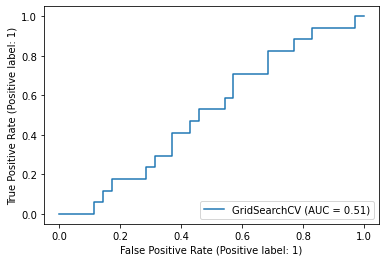

In [278]:
# 7.4. Make predictions using the best returned model
y_pred = clf.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]

# 7.5 Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0             # 'Accuracy: 82.11165535218126'

# 7.6 Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)

# 7.7 F1 score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test,y_pred, pos_label = 1)      # 0.8664199696263183

print("\n\n--F1 Score pos-label: 0--\n")
f1_score(y_test,y_pred, pos_label = 0)      # 0.729313857223354

# 7.8 ROC curve and get AUC
print("\n\n--ROC curve--\n")
_=plot_roc_curve(clf, X_test, y_test)

In [279]:
# 7.9 Get feature importances from GridSearchCV best fitted 'xg' model
#     See stackoverflow: https://stackoverflow.com/q/48377296

print("\n\n--How many features--\n")
clf.best_estimator_.named_steps["xg"].feature_importances_.shape

# 7.9.1
print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_



--How many features--



(25,)



---Feature importances---



array([-0.0206691 ,  0.0547133 ,  0.02061093, -0.10248916, -0.00809795,
        0.09088443, -0.0803692 ,  0.08191696,  0.15640213, -0.09679094,
       -0.2038652 ,  0.14193584,  0.06556106, -0.02398242,  0.21696568,
        0.07189418,  0.13717219, -0.07282328,  0.12779072,  0.07646221,
        0.19794841,  0.0826631 ,  0.05282475, -0.2422064 ,  0.27554777],
      dtype=float32)

In [285]:
colnames = X2.iloc[:, 0:25].columns.tolist()


In [286]:
# 7.10 Create a dataframe of feature importances
#      with names of columns and sorted by feature-imp

imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

# 7.10.1
df_imp

,imp
SpMax8_Bhv,-0.242206
minHBint6,-0.203865
MATS3p,-0.102489
MATS3m,-0.096791
MATS3e,-0.080369
SpMax8_Bhm,-0.072823
MATS3i,-0.023982
MATS3v,-0.020669
nHBDon_Lipinski,-0.008098
MATS3s,0.020611


In [287]:
##FINAL SELECTED INDEPENDANT VARIABLES

In [289]:
t2 = pd.read_csv("Toxicity-13F.csv")

In [290]:
t2.head()

,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4,Class
0,60.1757,-0.0231,-0.6667,-167.1241,0.0000,3.4009,2.3109,4,1.0229,1.0575,3.5545,-15.5940,4.1692,NonToxic
1,44.5031,-0.1236,-16.5096,-16.2080,172.2000,3.3611,2.1117,2,1.7155,1.7013,3.6066,-14.3317,2.0821,NonToxic
2,37.5488,0.0662,19.3467,-159.1796,173.4028,3.2705,2.0198,8,0.6992,0.7828,3.6441,-25.4493,2.8730,NonToxic
3,40.5929,0.0714,-9.5672,-21.4416,177.2726,3.2748,2.0191,6,0.9951,1.0298,3.6564,-19.6376,3.0444,NonToxic
4,52.7343,-0.0861,-11.8892,-2.0780,171.1315,3.4094,2.1664,2,0.7363,0.7427,3.5216,-8.2157,2.9469,NonToxic


In [291]:
X = t2.drop(['Class'], axis = 1)
y = t2['Class']

In [292]:
y = pd.DataFrame(y)

In [294]:
le = LabelEncoder()
y["Class"] = le.fit_transform(y["Class"])

In [296]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# get numeric data
num_d = X.select_dtypes(exclude=['object'])

# update the cols with their normalized values
X[num_d.columns] = sc.fit_transform(num_d)



In [297]:
X.head()

,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4
0,2.092225,-0.217352,0.186968,-2.625719,-5.444685,0.943537,3.350632,0.801468,-0.147984,-0.149481,0.652473,0.197797,1.888770
1,0.533787,-1.450246,-0.341704,0.313640,0.966668,0.735030,0.869555,-0.491466,1.378524,1.145486,0.915040,0.227784,-0.573989
2,-0.157729,0.878145,0.854810,-2.470986,1.011450,0.260388,-0.275078,3.387336,-0.861428,-0.702024,1.104027,-0.036324,0.359266
3,0.144968,0.941937,-0.110039,0.211706,1.155531,0.282915,-0.283797,2.094402,-0.209256,-0.205198,1.166015,0.101738,0.561516
4,1.352274,-0.990211,-0.187523,0.588847,0.926885,0.988068,1.550855,-0.491466,-0.779658,-0.782683,0.486667,0.373075,0.446467


In [298]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [299]:
t3 = pd.read_csv("Toxicity-13F.csv")

In [300]:
t3.head()

,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4,Class
0,60.1757,-0.0231,-0.6667,-167.1241,0.0000,3.4009,2.3109,4,1.0229,1.0575,3.5545,-15.5940,4.1692,NonToxic
1,44.5031,-0.1236,-16.5096,-16.2080,172.2000,3.3611,2.1117,2,1.7155,1.7013,3.6066,-14.3317,2.0821,NonToxic
2,37.5488,0.0662,19.3467,-159.1796,173.4028,3.2705,2.0198,8,0.6992,0.7828,3.6441,-25.4493,2.8730,NonToxic
3,40.5929,0.0714,-9.5672,-21.4416,177.2726,3.2748,2.0191,6,0.9951,1.0298,3.6564,-19.6376,3.0444,NonToxic
4,52.7343,-0.0861,-11.8892,-2.0780,171.1315,3.4094,2.1664,2,0.7363,0.7427,3.5216,-8.2157,2.9469,NonToxic


In [302]:
t3.shape

(171, 14)

In [309]:
t3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MDEC-23     171 non-null    float64
 1   MATS2v      171 non-null    float64
 2   ATSC8s      171 non-null    float64
 3   VE3_Dt      171 non-null    float64
 4   CrippenMR   171 non-null    float64
 5   SpMax7_Bhe  171 non-null    float64
 6   SpMin1_Bhs  171 non-null    float64
 7   C1SP2       171 non-null    int64  
 8   GATS8e      171 non-null    float64
 9   GATS8s      171 non-null    float64
 10  SpMax5_Bhv  171 non-null    float64
 11  VE3_Dzi     171 non-null    float64
 12  VPC-4       171 non-null    float64
 13  Class       171 non-null    object 
dtypes: float64(12), int64(1), object(1)
memory usage: 18.8+ KB


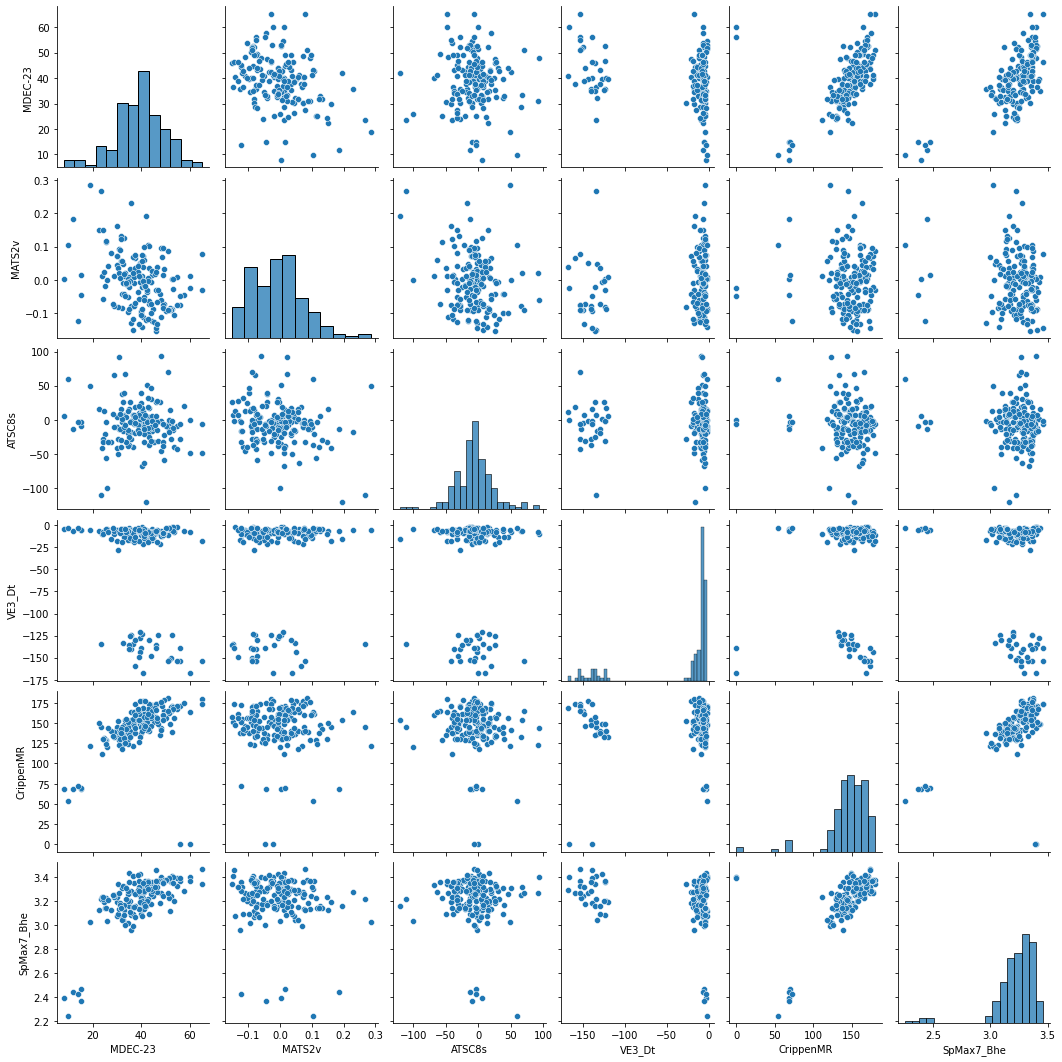

In [310]:
sns.pairplot(t3.iloc[:, 0:6])

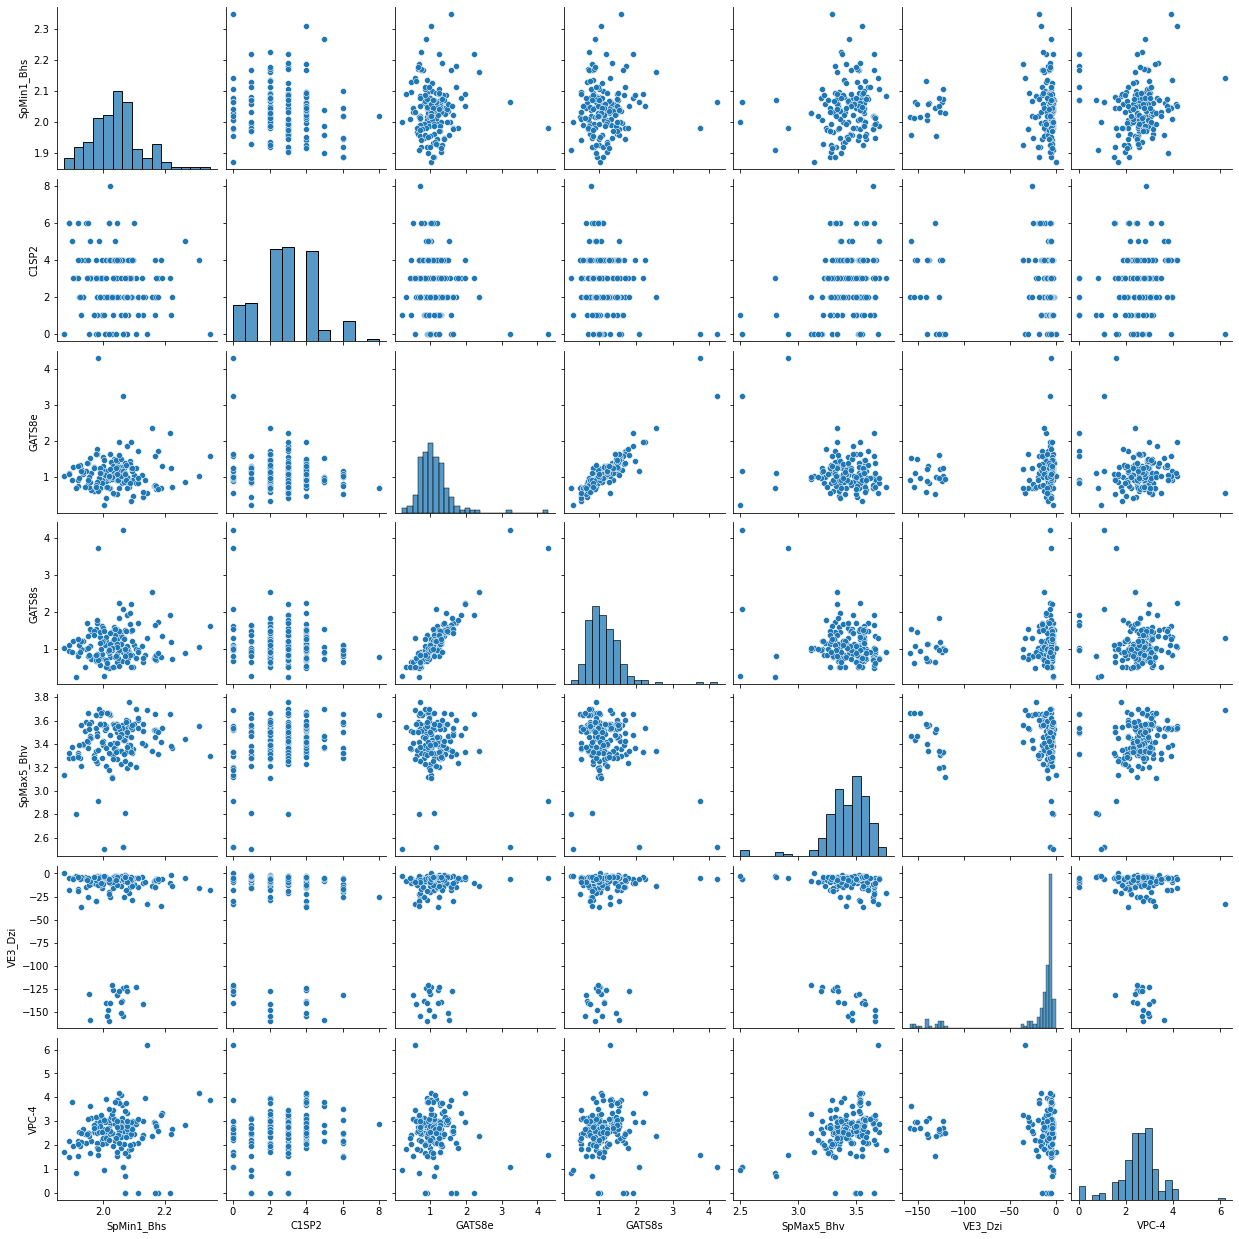

In [313]:
sns.pairplot(t3.iloc[:, 6:13])

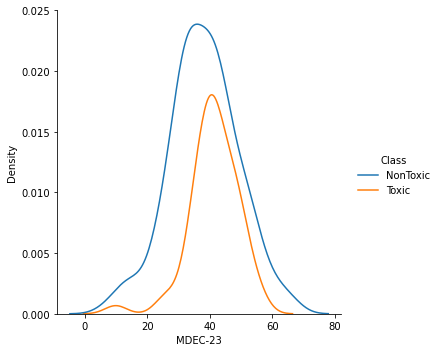

In [315]:
_=sns.displot(x = "MDEC-23",hue =  "Class", kind = "kde", data = t3)

In [319]:
num_atr = t3.iloc[:, 0:6]

<AxesSubplot:>

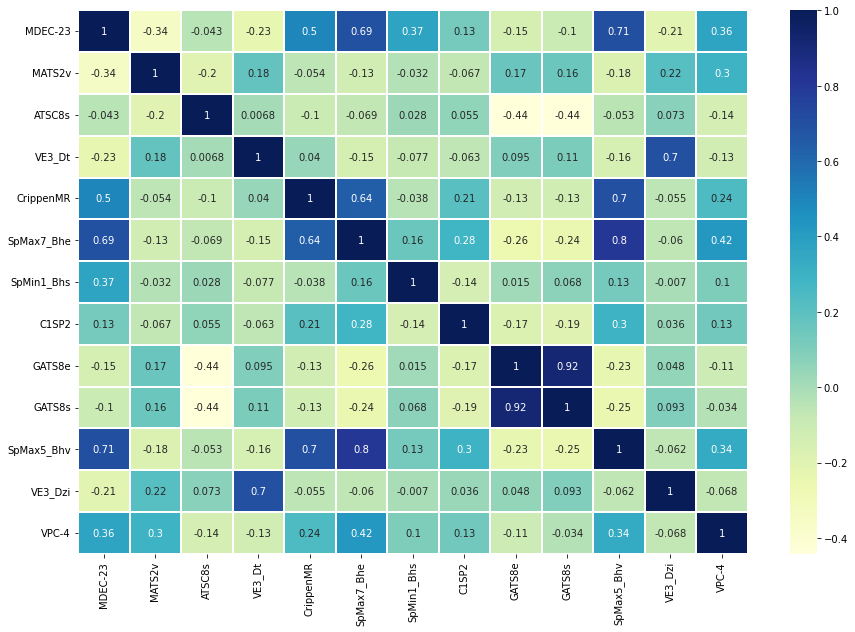

In [324]:
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(t3.corr(), annot=True, linewidths=.05, cmap="YlGnBu",ax=ax)
plt.show() 

<Figure size 1440x1800 with 0 Axes>

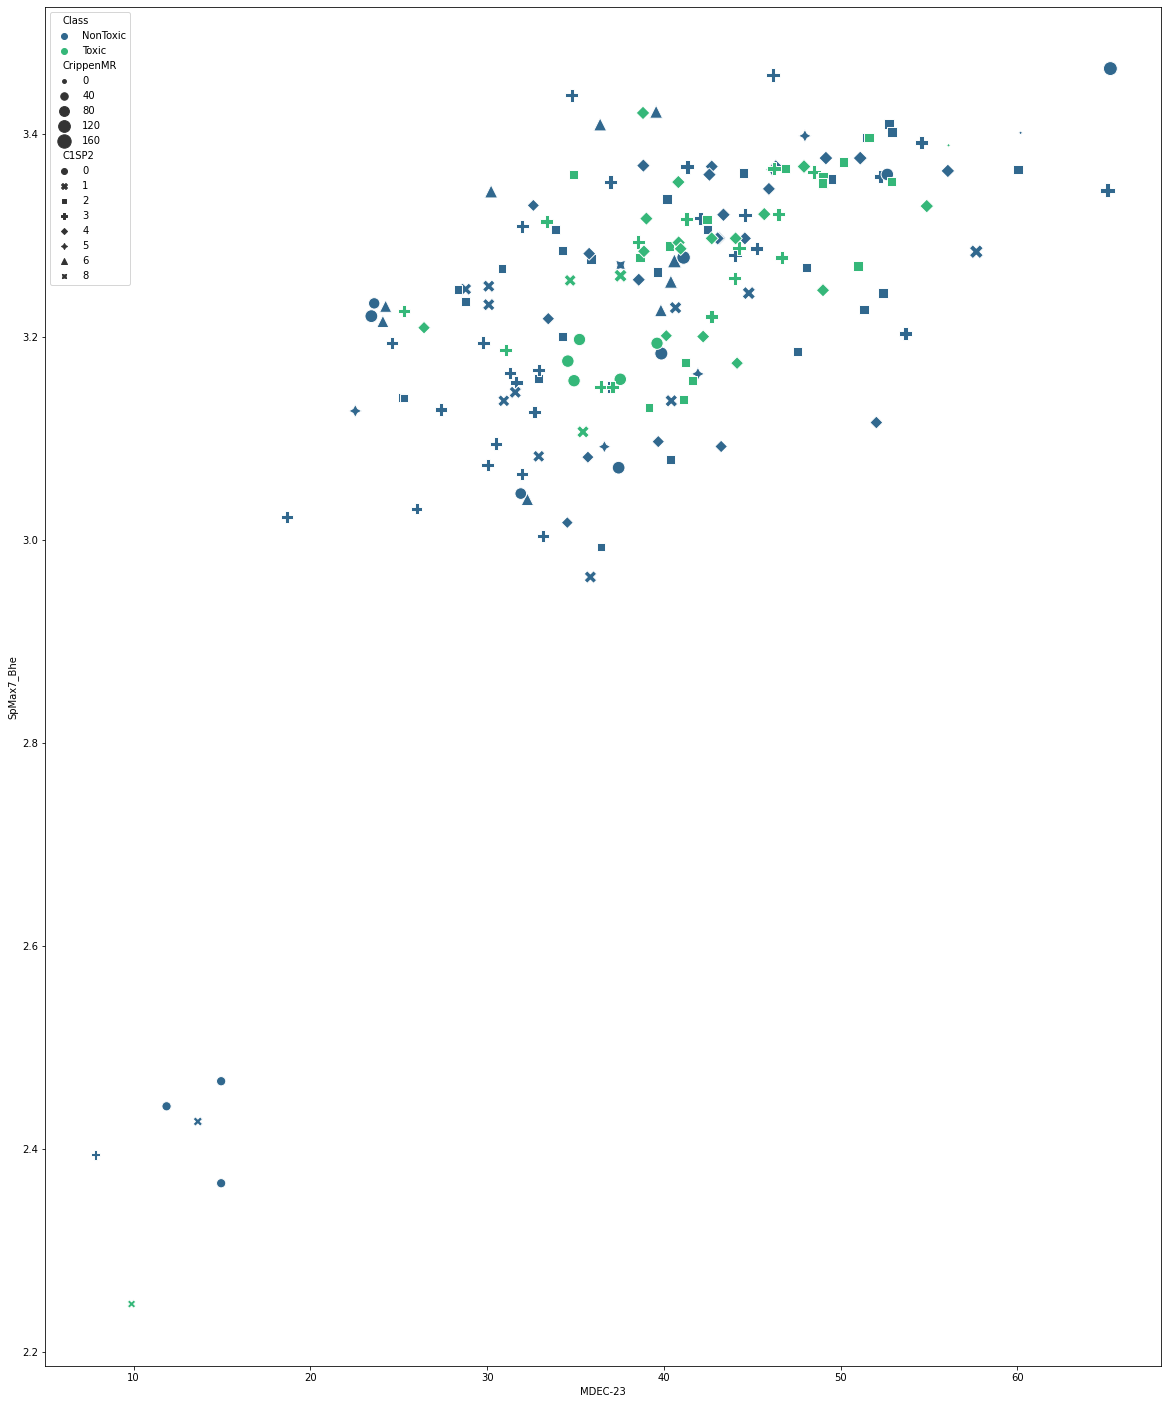

In [326]:
plt.figure(figsize = (20,25))

_=sns.scatterplot(x = "MDEC-23", y= "SpMax7_Bhe", hue = "Class",size= "CrippenMR", 
                  style= "C1SP2", sizes = (15,200),
                   data= t3,palette = "viridis")

In [314]:
t3.head()

,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4,Class
0,60.1757,-0.0231,-0.6667,-167.1241,0.0000,3.4009,2.3109,4,1.0229,1.0575,3.5545,-15.5940,4.1692,NonToxic
1,44.5031,-0.1236,-16.5096,-16.2080,172.2000,3.3611,2.1117,2,1.7155,1.7013,3.6066,-14.3317,2.0821,NonToxic
2,37.5488,0.0662,19.3467,-159.1796,173.4028,3.2705,2.0198,8,0.6992,0.7828,3.6441,-25.4493,2.8730,NonToxic
3,40.5929,0.0714,-9.5672,-21.4416,177.2726,3.2748,2.0191,6,0.9951,1.0298,3.6564,-19.6376,3.0444,NonToxic
4,52.7343,-0.0861,-11.8892,-2.0780,171.1315,3.4094,2.1664,2,0.7363,0.7427,3.5216,-8.2157,2.9469,NonToxic


E:\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


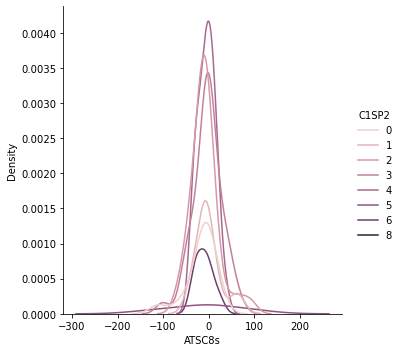

In [329]:
_=sns.displot(x = "ATSC8s",hue =  "C1SP2", kind = "kde", data = t3)

<Figure size 1440x1080 with 0 Axes>

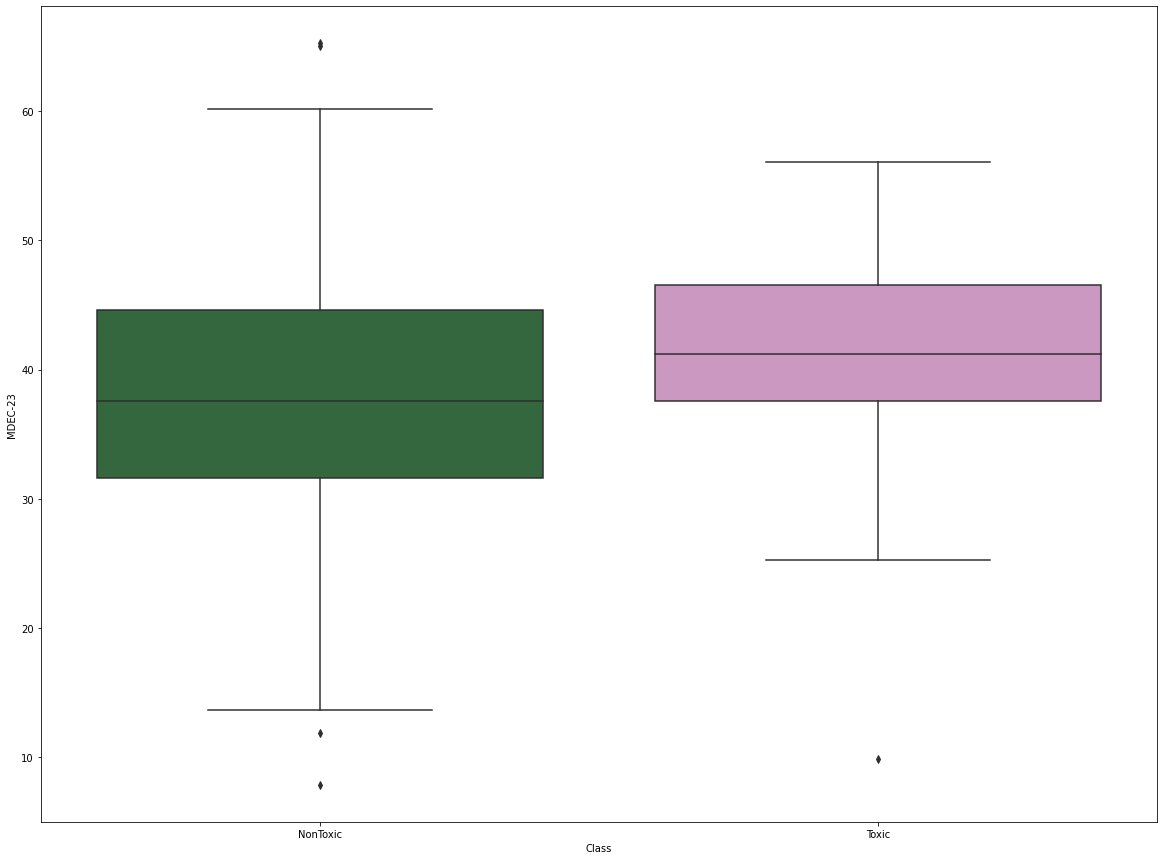

In [331]:
plt.figure(figsize = (20,15))
_=sns.boxplot(x="Class", y= "MDEC-23",data=t3, palette = "cubehelix" )


<Figure size 1080x2520 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Class', ylabel='MDEC-23'>

Text(0.5, 0, 'MDEC-23')

(array([0, 1]), [Text(0, 0, 'NonToxic'), Text(1, 0, 'Toxic')])

<AxesSubplot:>

<AxesSubplot:xlabel='Class', ylabel='MATS2v'>

Text(0.5, 0, 'MATS2v')

(array([0, 1]), [Text(0, 0, 'NonToxic'), Text(1, 0, 'Toxic')])

<AxesSubplot:>

<AxesSubplot:xlabel='Class', ylabel='ATSC8s'>

Text(0.5, 0, 'ATSC8s')

(array([0, 1]), [Text(0, 0, 'NonToxic'), Text(1, 0, 'Toxic')])

<AxesSubplot:>

<AxesSubplot:xlabel='Class', ylabel='VE3_Dt'>

Text(0.5, 0, 'VE3_Dt')

(array([0, 1]), [Text(0, 0, 'NonToxic'), Text(1, 0, 'Toxic')])

<AxesSubplot:>

<AxesSubplot:xlabel='Class', ylabel='CrippenMR'>

Text(0.5, 0, 'CrippenMR')

(array([0, 1]), [Text(0, 0, 'NonToxic'), Text(1, 0, 'Toxic')])

<AxesSubplot:>

<AxesSubplot:xlabel='Class', ylabel='SpMax7_Bhe'>

Text(0.5, 0, 'SpMax7_Bhe')

(array([0, 1]), [Text(0, 0, 'NonToxic'), Text(1, 0, 'Toxic')])

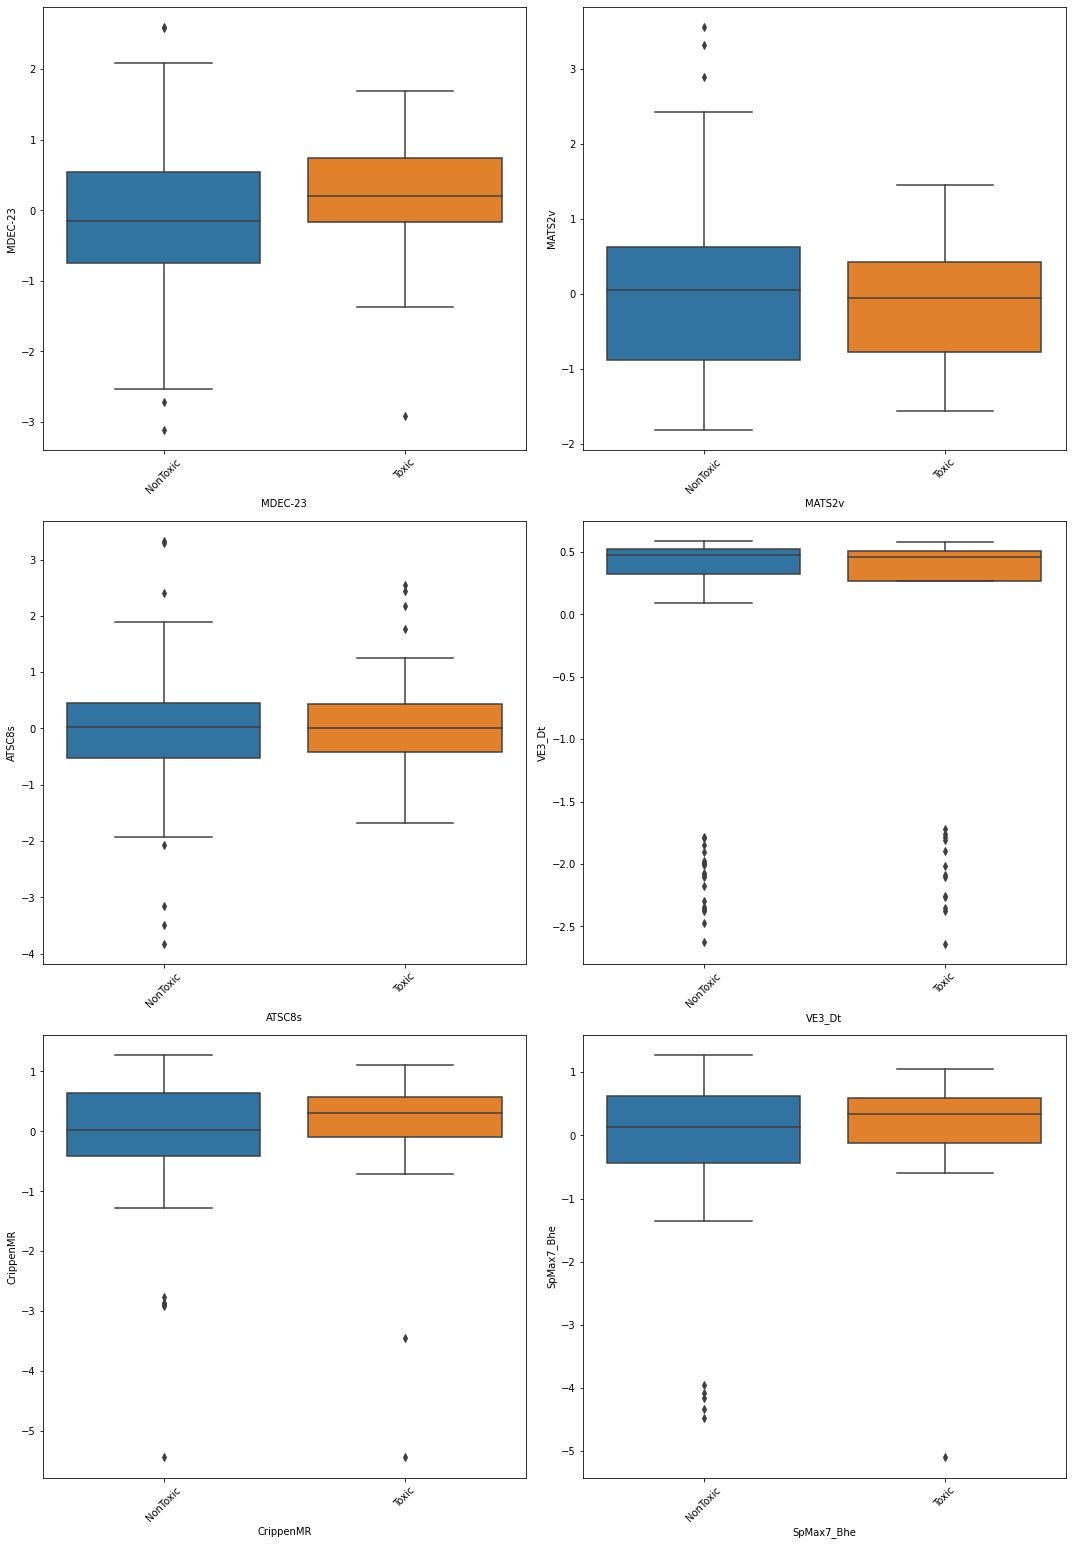

In [333]:
plt.figure(figsize=(15,35))
x=1
for i in num_atr:
    plt.subplot(5,2,x)
    sns.boxplot(data=t,y=i,x="Class")
    plt.xlabel(i,fontsize=10)
    plt.tight_layout()
    plt.xticks(rotation = 45)
    x=x+1
plt.show()

In [334]:
X

,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4
0,2.092225,-0.217352,0.186968,-2.625719,-5.444685,0.943537,3.350632,0.801468,-0.147984,-0.149481,0.652473,0.197797,1.888770
1,0.533787,-1.450246,-0.341704,0.313640,0.966668,0.735030,0.869555,-0.491466,1.378524,1.145486,0.915040,0.227784,-0.573989
2,-0.157729,0.878145,0.854810,-2.470986,1.011450,0.260388,-0.275078,3.387336,-0.861428,-0.702024,1.104027,-0.036324,0.359266
3,0.144968,0.941937,-0.110039,0.211706,1.155531,0.282915,-0.283797,2.094402,-0.209256,-0.205198,1.166015,0.101738,0.561516
4,1.352274,-0.990211,-0.187523,0.588847,0.926885,0.988068,1.550855,-0.491466,-0.779658,-0.782683,0.486667,0.373075,0.446467
5,1.317162,-1.019653,0.026911,-2.294328,0.711774,0.116318,-0.314935,-0.491466,-0.410484,-0.498466,1.211373,-3.213204,0.170585
6,1.683081,-0.860174,-0.723510,-2.372850,0.898235,0.747079,0.272951,0.801468,0.052362,-0.106637,0.035113,-3.084414,0.482811
7,0.151223,-1.305488,0.623344,0.527283,0.023246,0.040879,1.096240,-1.137933,-1.405161,-0.972563,0.418632,0.326454,-0.163352
8,-0.714397,-0.957088,0.123296,0.492624,-0.883771,-0.816202,1.710281,0.155001,1.388443,1.188732,-0.552009,0.379166,-3.030848
9,-0.341677,-0.927646,0.167958,-1.785084,-0.400652,-0.730284,-0.144298,0.801468,0.253589,0.087869,-0.608454,-2.435886,-0.131846


In [335]:
y

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [336]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=4)

In [338]:
knn = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
knn.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [339]:
y_pred = knn.predict(X_test)

In [340]:
confusion_matrix(y_test, y_pred)

array([[13,  5],
       [ 7,  1]], dtype=int64)

In [341]:
from sklearn.metrics import accuracy_score

In [342]:
accuracy_score(y_test, y_pred)

0.5384615384615384

In [343]:
from sklearn.metrics import precision_recall_fscore_support

In [344]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.65      , 0.16666667]),
 array([0.72222222, 0.125     ]),
 array([0.68421053, 0.14285714]),
 array([18,  8], dtype=int64))

In [345]:
from sklearn.metrics import precision_score

In [346]:
precision_score(y_test, y_pred)

0.16666666666666666

In [347]:
from sklearn.metrics import recall_score

In [348]:
recall_score(y_test, y_pred)

0.125

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=12)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=13)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=14)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=16)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=17)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=18)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=19)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=21)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=22)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=23)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=24)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=25)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=26)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=27)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=28)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=29)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=30)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=31)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=32)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=33)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=34)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=35)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=36)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=37)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=38)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=39)

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Error Rate vs. K Value')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Error Rate')

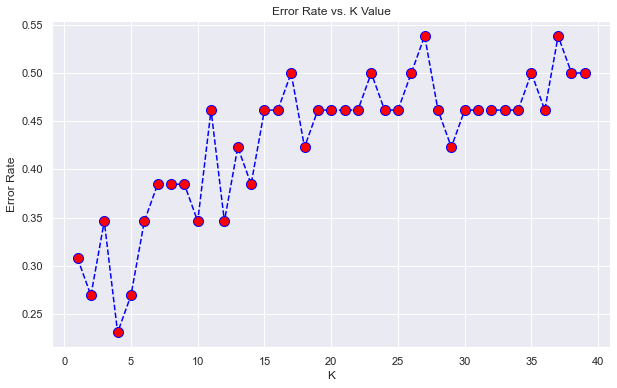

Minimum error:- 0.23076923076923073 at K = 4


In [349]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [350]:
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [351]:
y_pred = knn.predict(X_test)

In [352]:
accuracy_score(y_test, y_pred)

0.7692307692307693

In [353]:
from sklearn.tree import DecisionTreeClassifier
df = DecisionTreeClassifier(max_depth=10,random_state=42)
df.fit(X_train,y_train)
y_pred = df.predict(X_test)
print(accuracy_score(y_test,y_pred))

DecisionTreeClassifier(max_depth=10, random_state=42)

0.7307692307692307


In [354]:
from sklearn.ensemble import RandomForestClassifier

In [355]:
rf = RandomForestClassifier(max_depth=4)
rf.fit(X_train, y_train)

C:\Users\saad3\AppData\Local\Temp\ipykernel_16520\1683762422.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=4)

In [356]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.6153846153846154


E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Error Rate vs. K Value')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Error Rate')

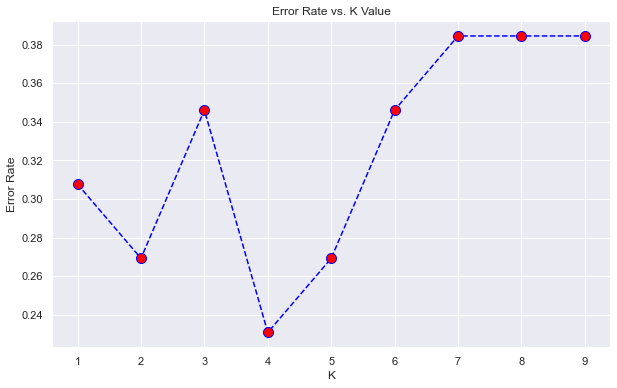

Minimum error:- 0.23076923076923073 at K = 4


In [357]:
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [358]:
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [359]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.7692307692307693